## $\Rightarrow$ In this notebook, we shall describe how to calculate the 'MAP' values from the posterior samples obtained from the LIGO Result and then use them as the values for our injection parameters

<br>

In [1]:
# import modules

import json
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import h5py


from pycbc.waveform.generator import FDomainDetFrameGenerator, FDomainCBCGenerator
from pycbc.types.frequencyseries import load_frequencyseries
from pycbc import noise
from pycbc.waveform import get_fd_waveform
import pycbc

from pycbc.cosmology import redshift
from pycbc.cosmology import cosmological_quantity_from_redshift

### Link : https://dcc.ligo.org/LIGO-P2000193/public
#### $\Rightarrow$Download the ```Original_bilby_results_files```

## Data Extraction

In [2]:
# open the json file

f = open("GW170817_IMRPhenomPv2_NRTidal_lowspin_0_result.json")
data = json.load(f)
data.keys()

dict_keys(['label', 'outdir', 'sampler', 'log_evidence', 'log_evidence_err', 'log_noise_evidence', 'log_bayes_factor', 'priors', 'posterior', 'injection_parameters', 'meta_data', 'search_parameter_keys', 'fixed_parameter_keys', 'constraint_parameter_keys', 'sampling_time', 'sampler_kwargs', 'use_ratio', 'log_likelihood_evaluations', 'log_prior_evaluations', 'samples', 'nested_samples', 'parameter_labels', 'parameter_labels_with_unit', 'version'])

In [3]:
data['posterior']['content'].keys()

dict_keys(['H1_matched_filter_snr', 'H1_optimal_snr', 'L1_matched_filter_snr', 'L1_optimal_snr', 'V1_matched_filter_snr', 'V1_optimal_snr', 'a_1', 'a_2', 'catch_waveform_errors', 'chi_1_in_plane', 'chi_2_in_plane', 'chi_eff', 'chi_p', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_theta_jn', 'cos_tilt_1', 'cos_tilt_2', 'dec', 'geocent_time', 'iota', 'lambda_1', 'lambda_2', 'log_likelihood', 'log_prior', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'maximum_frequency', 'minimum_frequency', 'mode_array', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'pn_amplitude_order', 'pn_phase_order', 'pn_spin_order', 'pn_tidal_order', 'psi', 'ra', 'recalib_H1_amplitude_0', 'recalib_H1_amplitude_1', 'recalib_H1_amplitude_2', 'recalib_H1_amplitude_3', 'recalib_H1_amplitude_4', 'recalib_H1_amplitude_5', 'recalib_H1_amplitude_6', 'recalib_H1_amplitude_7', 'recalib_H1_amplitude_8', 'recalib_H1_amplitude_9', 'recalib_H1_frequency_0', 'recalib_H1

In [6]:
lambda_1 = data['posterior']['content']['lambda_1']
lambda_2 = data['posterior']['content']['lambda_2']

params = {'lambda_1':lambda_1, 'lambda_2': lambda_2}

params_name = ['lambda_1', 'lambda_2']

params_dict = {}

for p in params_name:
    
    kernel = gaussian_kde(params[p])
    map_val = params[p][np.argmax(kernel(params[p]))]
    params_dict[p] = map_val
    

In [7]:
params_dict

{'lambda_1': 109.67027445112875, 'lambda_2': 156.10246077987262}

In [9]:
np.quantile(lambda_1, 0.95) - np.quantile(lambda_1, 0.05)

1051.811559027381

In [10]:
np.quantile(lambda_2, 0.95) - np.quantile(lambda_2, 0.05)

1528.4772251832853

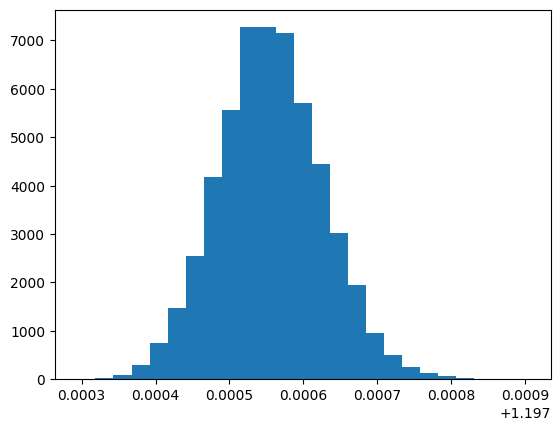

In [11]:
mc = data['posterior']['content']['chirp_mass']
plt.hist(mc, bins=25);

In [12]:
#-- loading the posterior values of parameters into a numpy array --

m1_det = np.array(data['posterior']['content']['mass_1'])   # mass1_detector_frame
m2_det = np.array(data['posterior']['content']['mass_2'])   # mass2_detector_frame

m1_src = np.array(data['posterior']['content']['mass_1_source'])   # mass1_source_frame
m2_src = np.array(data['posterior']['content']['mass_2_source'])   # mass2_source_frame


s1z = np.zeros(len(data['posterior']['content']['mass_1']))   # spin1z
s2z = np.zeros(len(data['posterior']['content']['mass_1']))   # spin2z

for i in range(len(s1z)):
    
    s1z[i] = np.array(data['posterior']['content']['spin_1z'][i]['content'])
    s2z[i] = np.array(data['posterior']['content']['spin_2z'][i]['content'])


In [13]:
pycbc.conversions.mchirp_from_mass1_mass2(m1_src, para'm2_src')

array([1.19195278, 1.19069195, 1.19128232, ..., 1.186757  , 1.18516654,
       1.18566724])

In [14]:
#-- map_values of the samples --

params = ['m1_src', 'm2_src', 'm1_det', 'm2_det', 's1z', 's2z']

samples = {'m1_src': m1_src, 'm2_src': m2_src, 'm1_det': m1_det, 'm2_det': m2_det, 's1z': s1z, 's2z': s2z}

params_dict = {}

for p in params:
    
    kernel = gaussian_kde(samples[p])
    map_val = samples[p][np.argmax(kernel(samples[p]))]
    params_dict[p] = map_val
    

In [51]:
params_dict

{'m1_src': 1.387835558864302,
 'm2_src': 1.326302837525649,
 'm1_det': 1.399899220066443,
 'm2_det': 1.3506923499131296,
 's1z': 0.0001294116725339975,
 's2z': 3.5461352589076355e-05}

<br>

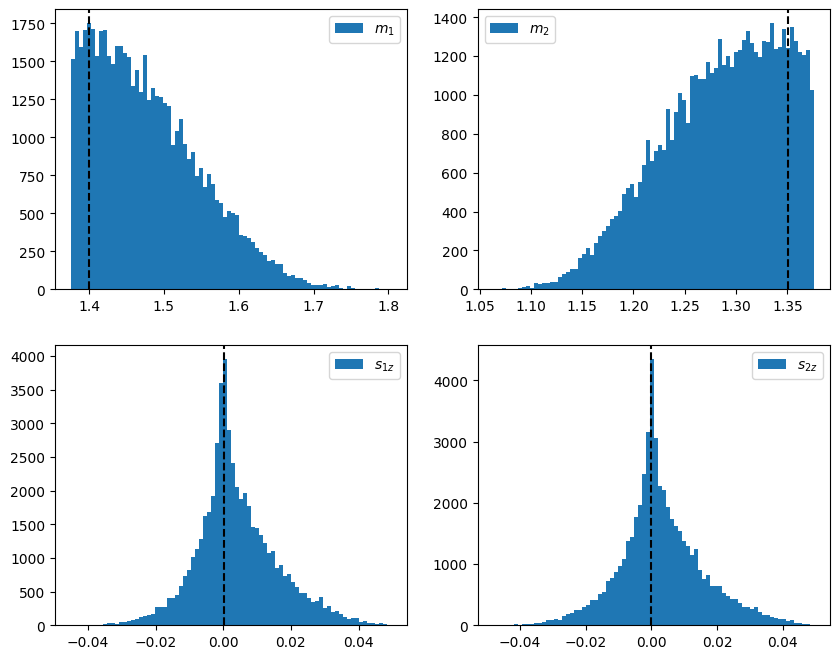

In [53]:
#-- plots --

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0,0].hist(m1_det, bins= 80, label = r'$m_1$')
ax[0, 0].axvline(x=params_dict['m1_det'], c='k', ls='--')
ax[0, 0].legend(loc="best")

ax[0,1].hist(m2_det, bins= 80, label = r'$m_2$')
ax[0, 1].axvline(x=params_dict['m2_det'], c='k', ls='--')
ax[0, 1].legend(loc="best")

ax[1,0].hist(s1z, bins= 80, label = r'$s_{1z}$')
ax[1, 0].axvline(x=params_dict['s1z'], c='k', ls='--')
ax[1, 0].legend(loc="best")

ax[1,1].hist(s2z, bins= 80, label = r'$s_{2z}$')
ax[1, 1].axvline(x=params_dict['s2z'], c='k', ls='--')
ax[1, 1].legend(loc="best")

plt.show()

<br>

In [59]:
#data['posterior']['content']['theta_jn']

theta_jn = np.array(data['posterior']['content']['theta_jn'])
    
kernel = gaussian_kde(theta_jn)
map_val = theta_jn[np.argmax(kernel(theta_jn))]
theta_jn_map = map_val

theta_jn_map

2.4985246005883943

In [60]:
#-- POLARIZATION ANGLE --
psi = np.array(data['posterior']['content']['psi'])
    
kernel = gaussian_kde(psi)
map_val = theta_jn[np.argmax(kernel(psi))]
psi_map = map_val

psi_map

2.2812131757865237

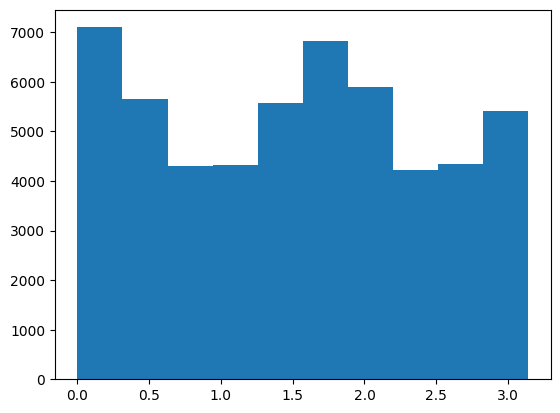

In [63]:
plt.hist(psi);

In [16]:
#-- checking for inclination content --

data['posterior']['content']['iota']

[{'__array__': True, 'content': 1.8798678403315747},
 {'__array__': True, 'content': 2.0840899709235075},
 {'__array__': True, 'content': 2.0817707782392834},
 {'__array__': True, 'content': 2.4510437908653433},
 {'__array__': True, 'content': 1.9251974188842216},
 {'__array__': True, 'content': 2.338203989346348},
 {'__array__': True, 'content': 2.1231984956023666},
 {'__array__': True, 'content': 2.458788731229644},
 {'__array__': True, 'content': 2.402125106976931},
 {'__array__': True, 'content': 2.9213081298995864},
 {'__array__': True, 'content': 2.824151520733257},
 {'__array__': True, 'content': 2.238485214394726},
 {'__array__': True, 'content': 2.5597271488713464},
 {'__array__': True, 'content': 2.044253922870666},
 {'__array__': True, 'content': 2.3821307657852517},
 {'__array__': True, 'content': 2.7099021531029885},
 {'__array__': True, 'content': 1.9553015795517903},
 {'__array__': True, 'content': 2.025669973397196},
 {'__array__': True, 'content': 3.000026993965835},
 

In [55]:
#-- for inclination --
iota = np.zeros(len(m1_det))

for i in range(len(m1_det)):
    
    iota[i] = np.array(data['posterior']['content']['iota'][i]['content'])
    
kernel = gaussian_kde(iota)
map_val = iota[np.argmax(kernel(iota))]
iota_map = map_val

iota_map

2.4975664366099606

In [19]:
#data['posterior']['content']['luminosity_distance']

In [20]:
#-- for luminosity distance --

distance_samps = np.array(data['posterior']['content']['luminosity_distance'])
    
kernel = gaussian_kde(distance_samps)
map_val = distance_samps[np.argmax(kernel(distance_samps))]
distance_map = map_val

distance_map

44.26834847385753

In [22]:
#-- for comoving distance--

comoving_distance_samps = np.array(data['posterior']['content']['comoving_distance'])
    
kernel = gaussian_kde(comoving_distance_samps)
map_val = comoving_distance_samps[np.argmax(kernel(comoving_distance_samps))]
comoving_distance_map = map_val

comoving_distance_map

43.83685044077357

In [23]:
(4/3) * np.pi * (comoving_distance_map)**3

352863.42113160953

In [24]:
comoving_distance_samps.min()

12.2378041977555

In [27]:
(4/3) * np.pi * (comoving_distance_samps.max())**3

599957.7606285573

In [39]:
#-- redshift --

z_min, z_max = redshift(distance_samps.min()), redshift(distance_samps.max())

In [40]:
#-- comoving volume --

V_com_min = cosmological_quantity_from_redshift(z=z_min, quantity='comoving_volume')
V_com_max = cosmological_quantity_from_redshift(z=z_max, quantity='comoving_volume')

In [42]:
#-- comoving volume limits --

V_com_min, V_com_max

(7677.129885864734, 599957.3564633214)

In [30]:
data['priors'].keys()

dict_keys(['chirp_mass', 'mass_ratio', 'mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'dec', 'ra', 'cos_theta_jn', 'psi', 'phase', 'lambda_1', 'lambda_2', 'geocent_time', 'recalib_H1_amplitude_0', 'recalib_H1_amplitude_1', 'recalib_H1_amplitude_2', 'recalib_H1_amplitude_3', 'recalib_H1_amplitude_4', 'recalib_H1_amplitude_5', 'recalib_H1_amplitude_6', 'recalib_H1_amplitude_7', 'recalib_H1_amplitude_8', 'recalib_H1_amplitude_9', 'recalib_H1_phase_0', 'recalib_H1_phase_1', 'recalib_H1_phase_2', 'recalib_H1_phase_3', 'recalib_H1_phase_4', 'recalib_H1_phase_5', 'recalib_H1_phase_6', 'recalib_H1_phase_7', 'recalib_H1_phase_8', 'recalib_H1_phase_9', 'recalib_H1_frequency_0', 'recalib_H1_frequency_1', 'recalib_H1_frequency_2', 'recalib_H1_frequency_3', 'recalib_H1_frequency_4', 'recalib_H1_frequency_5', 'recalib_H1_frequency_6', 'recalib_H1_frequency_7', 'recalib_H1_frequency_8', 'recalib_H1_frequency_9', 'recalib_L1_amplitude_0', 'recalib_L1_a

In [31]:
data['priors']['luminosity_distance']

{'__prior__': True,
 '__module__': 'bilby.core.prior.analytical',
 '__name__': 'PowerLaw',
 'kwargs': {'alpha': 2,
  'minimum': 1,
  'maximum': 75,
  'name': 'luminosity_distance',
  'latex_label': '$d_L$',
  'unit': None,
  'boundary': None}}

In [34]:
data['priors']['__prior_dict__']

True